In [ ]:
!mkdir Inputs
!mkdir Outputs
!mkdir densepose
!pip install av scipy opencv-python
!pip install omegaconf==2.3.0
!pip install hydra-core==1.3.2

In [2]:
%cd '/content/Inputs'
from google.colab import files
uploaded = files.upload()

/content/Inputs


Saving 00005_00.jpg to 00005_00.jpg


In [ ]:
%cd /content/densepose
!git clone https://github.com/facebookresearch/detectron2
%cd /content/densepose/detectron2
!python setup.py install
!pip install git+https://github.com/facebookresearch/fvcore.git

In [8]:
%cd /content/densepose/detectron2/projects/DensePose

/content/densepose/detectron2/projects/DensePose


In [16]:
!python apply_net.py show configs/densepose_rcnn_R_50_FPN_s1x.yaml \
https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl \
/content/Inputs/00005_00.jpg dp_segm -v \
--output /content/drive/MyDrive/virtual_tryon_project/virtual-tryon/outputs/densepose/00005_00_segm.png \
--opts MODEL.DEVICE cpu


[02/24 17:46:36 apply_net]: Loading config from configs/densepose_rcnn_R_50_FPN_s1x.yaml
[02/24 17:46:36 apply_net]: Loading model from https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_50_FPN_s1x/165712039/model_final_162be9.pkl
[02/24 17:46:39 apply_net]: Loading data from /content/Inputs/00005_00.jpg
/usr/local/lib/python3.12/dist-packages/torch/functional.py:505: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4381.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
W0224 17:46:46.135000 6340 torch/fx/_symbolic_trace.py:53] is_fx_tracing will return true for both fx.symbolic_trace and torch.export. Please use is_fx_tracing_symbolic_tracing() for specifically fx.symbolic_trace or torch.compiler.is_compiling() for specifically torch.export/compile.
[02/24 17:46:51 apply_net]: Processing /content/Inputs/00005_00.jpg
[02/24 17:46:52

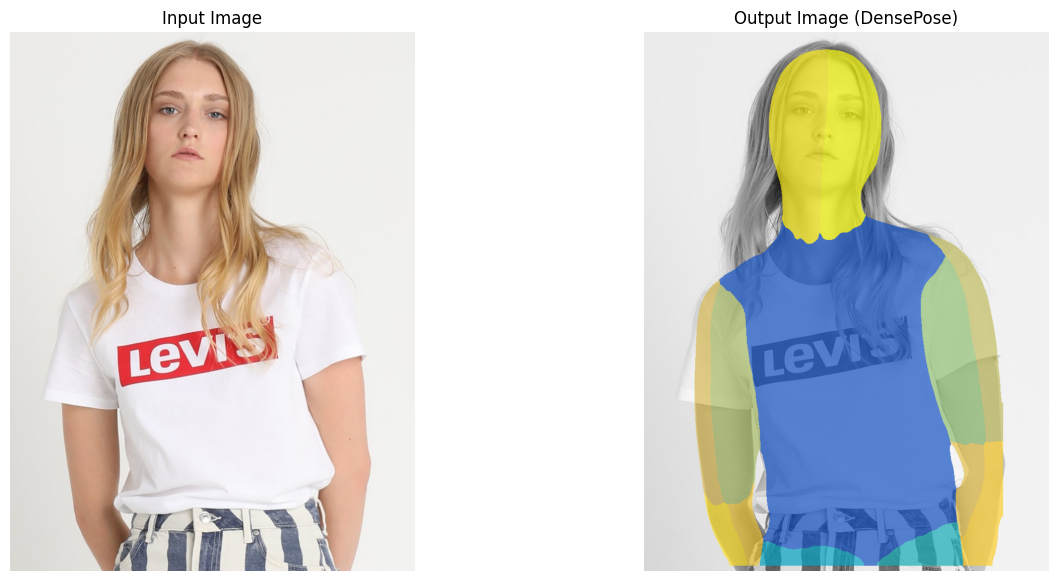

In [17]:
import matplotlib.pyplot as plt
import cv2

input_image_path = '/content/Inputs/00005_00.jpg'
input_image = cv2.imread(input_image_path)
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

output_image_path = '/content/drive/MyDrive/virtual_tryon_project/virtual-tryon/outputs/densepose/00005_00_segm.0001.png'
output_image = cv2.imread(output_image_path)
output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.imshow(input_image_rgb)
plt.title('Input Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output_image_rgb)
plt.title('Output Image (DensePose)')
plt.axis('off')

plt.show()